# Segunda parte do EP


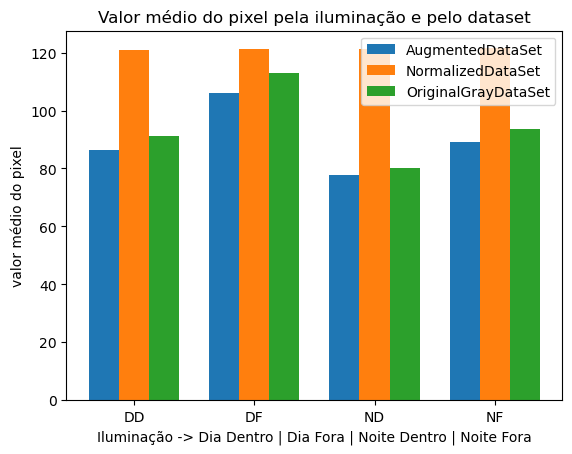

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

def plot_images(augmented_img_path, normalized_img_path, title):
    augmented_img = cv2.imread(augmented_img_path, cv2.IMREAD_GRAYSCALE)
    normalized_img = cv2.imread(normalized_img_path, cv2.IMREAD_GRAYSCALE)
    if augmented_img is not None and normalized_img is not None:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(augmented_img, cmap='gray')
        axs[0].set_title('Augmented Image')
        axs[0].axis('off')
        axs[1].imshow(normalized_img, cmap='gray')
        axs[1].set_title('Normalized Image')
        axs[1].axis('off')
        plt.suptitle(title)
        plt.show()

dirs = ['AugmentedDataSet', 'NormalizedDataSet', 'OriginalGrayDataSet']
sums = {dir: {'DD': 0, 'DF': 0, 'ND': 0, 'NF': 0} for dir in dirs}
counts = {dir: {'DD': 0, 'DF': 0, 'ND': 0, 'NF': 0} for dir in dirs}
pixel_counts = {dir: {'DD': 0, 'DF': 0, 'ND': 0, 'NF': 0} for dir in dirs}

def get_key(filename):
    parts = filename.split('_')
    day_night = parts[1]
    inside_outside = parts[3]
    
    if day_night == 'C':
        day_night = 'D'
    
    if inside_outside == 'C':
        inside_outside = 'D'
    
    return day_night + inside_outside

for dir in dirs:
    for filename in os.listdir(dir):
        if filename.endswith('.jpg'):
            img_path = os.path.join(dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                key = get_key(filename)
                if key in sums[dir]:
                    sums[dir][key] += np.sum(img)
                    counts[dir][key] += 1
                    pixel_counts[dir][key] += img.size
                else:
                    print(f"Unexpected key: {key} in file {filename}")
averages = {dir: {key: (sums[dir][key] / pixel_counts[dir][key] if counts[dir][key] > 0 else 0) for key in sums[dir]} for dir in sums}

labels = ['DD', 'DF', 'ND', 'NF']
x = np.arange(len(labels)) 
width = 0.25 

fig, ax = plt.subplots()

for i, dir in enumerate(dirs):
    values = [averages[dir][label] for label in labels]
    ax.bar(x + i*width, values, width, label=dir)

ax.set_xlabel('Iluminação -> Dia Dentro | Dia Fora | Noite Dentro | Noite Fora')
ax.set_ylabel('valor médio do pixel')
ax.set_title('Valor médio do pixel pela iluminação e pelo dataset')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

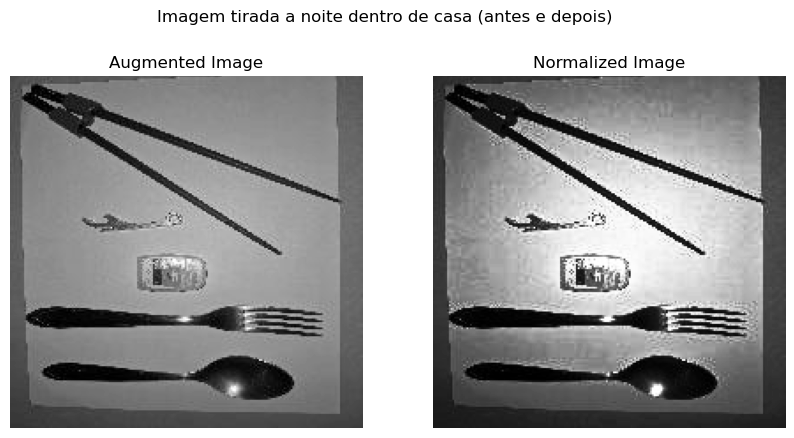

In [2]:
plot_images('AugmentedDataSet/cgfah_N_B_D_2_log.jpg', 'NormalizedDataSet/cgfah_N_B_D_2_log.jpg', 'Imagem tirada a noite dentro de casa (antes e depois)')


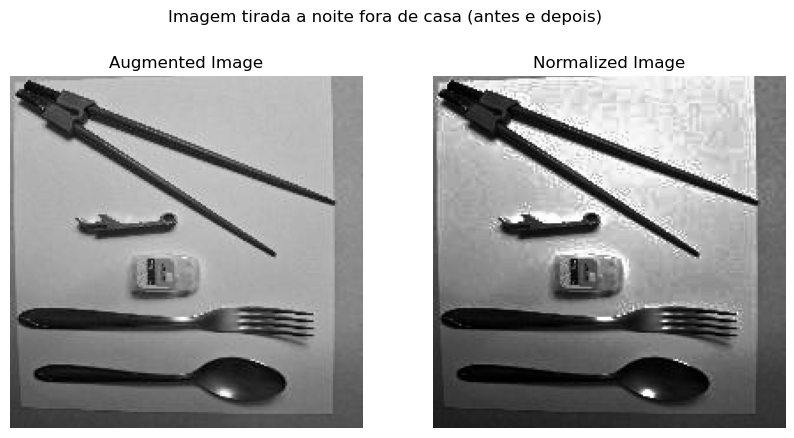

In [3]:
plot_images('AugmentedDataSet/cgfah_N_B_F_1_stretched.jpg', 'NormalizedDataSet/cgfah_N_B_F_1_stretched.jpg', 'Imagem tirada a noite fora de casa (antes e depois)')

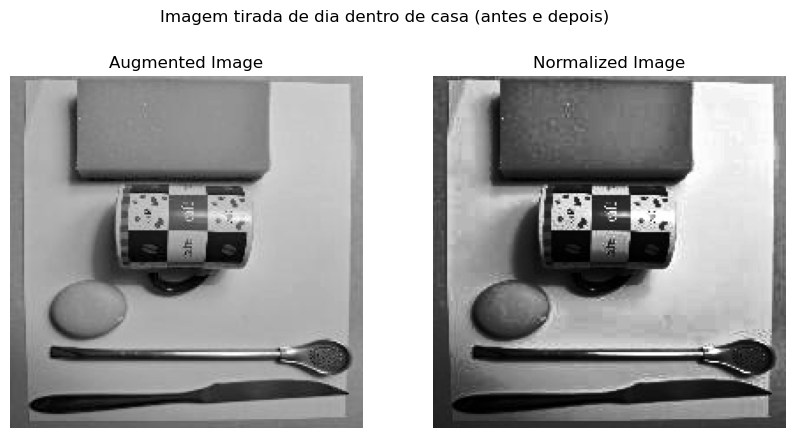

In [4]:
plot_images('AugmentedDataSet/exsbf_D_B_D_1_stretched.jpg', 'NormalizedDataSet/exsbf_D_B_D_1_stretched.jpg', 'Imagem tirada de dia dentro de casa (antes e depois)')

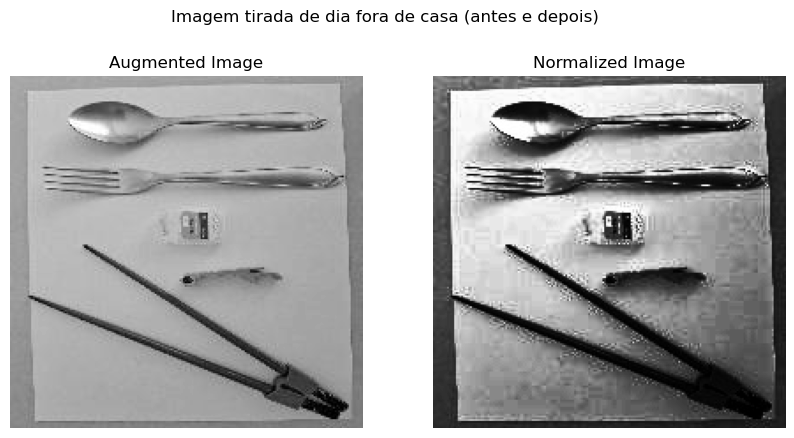

In [5]:
plot_images('AugmentedDataSet/cgfah_D_B_F_1_log.jpg', 'NormalizedDataSet/cgfah_D_B_F_1_log.jpg', 'Imagem tirada de dia fora de casa (antes e depois)')

## Discussão:

## A normalização ressaltou os objetos ao acentuar o contraste, especialmente aqueles que possuem uma cor notavelmente distinta do fundo, como é o caso do hashi que é vermelho na imagem original com fundo branco. 

## Apesar de contraintutivo a primeira vista, faz sentido no histograma as imagens tiradas de noite possuírem um valor médio maior, pois elas foram tiradas com flash.